In [5]:
!pip install lightgbm



Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 891.0 kB/s eta 0:00:00m eta 0:00:010:01:01


In [47]:
# importing the required libraries to be used in the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from math import sqrt
import warnings
%matplotlib inline
import joblib

In [10]:
# loading the data as a pandas dataframe
hour_data = pd.read_csv("hour.csv")
day_data = pd.read_csv("day.csv")

In [11]:
# viewing the first five rows of the data 
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
# viewing the first five rows of the data 
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
# checking information about the hour dataset
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# cehcking the shape of the hour data
hour_data.shape

(17379, 17)

In [14]:
# summary statistics of the hour data
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
# checking for null values:
hour_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing data in the dateset

In [16]:
# renaming some of the columns to complete names instead of abbreviations
hour_data = hour_data.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})

In [17]:
# checking the renamed columns
hour_data.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## **Data Visualization**

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

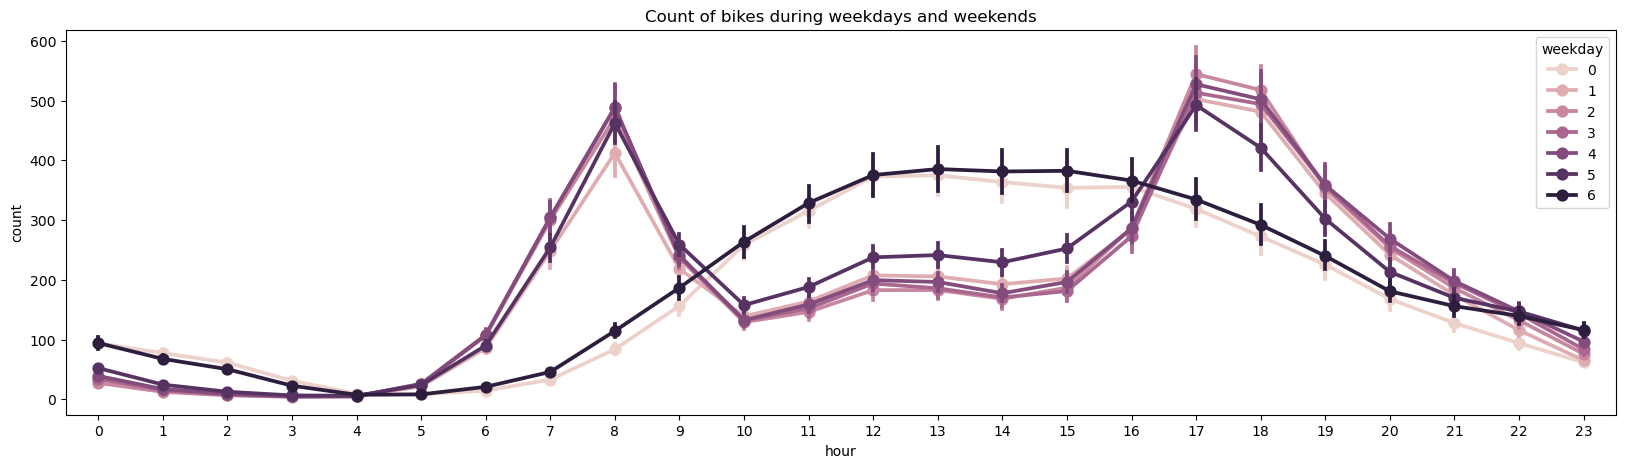

In [18]:
# plot to show the count of bikes during weekdays and weekends
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hour_data, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

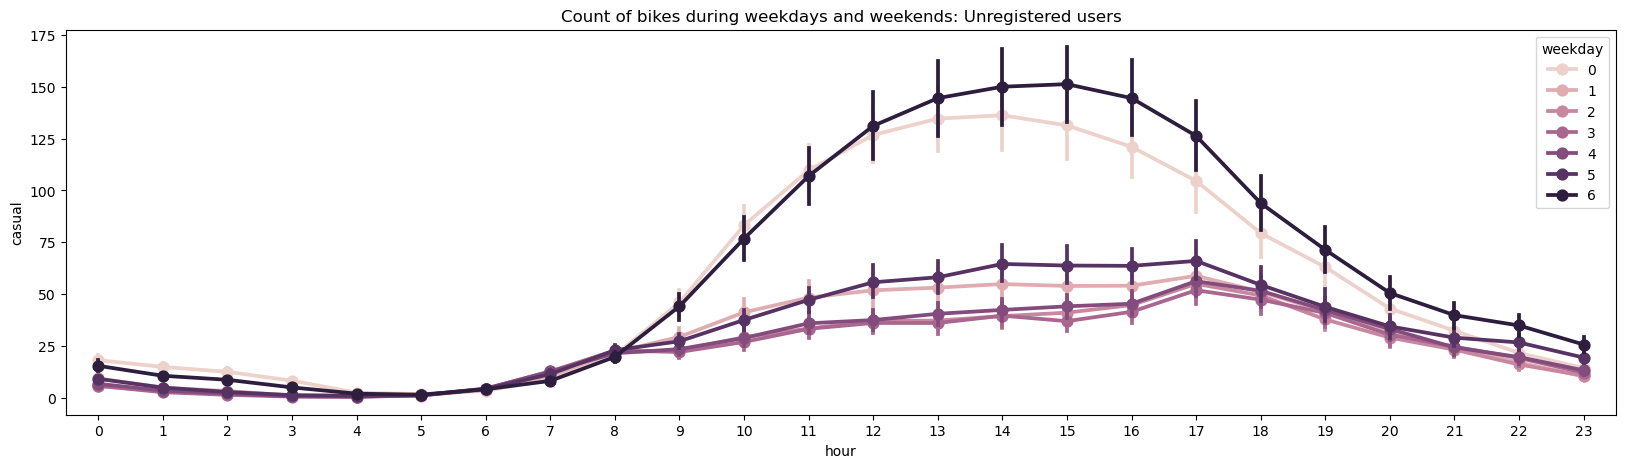

In [19]:
# plot to show the count of bikes during weekdays and weekends for unregistered users
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hour_data, x='hour', y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

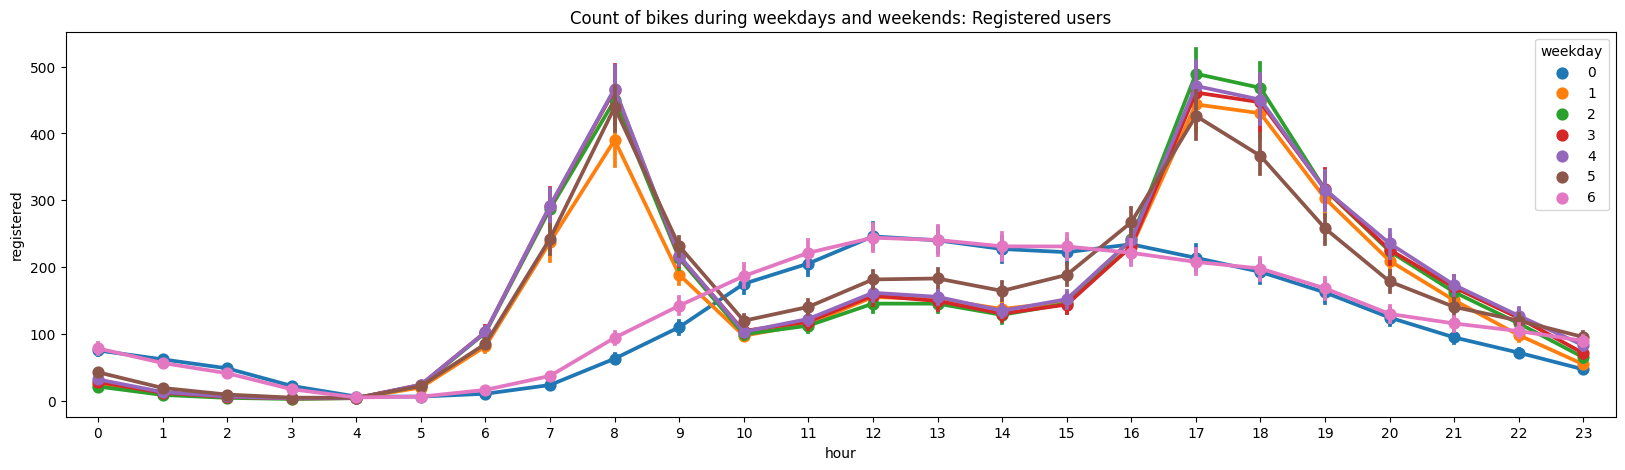

In [ ]:
# plot to show the count of bikes during weekdays and weekends for registered users
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hour_data, x='hour', y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

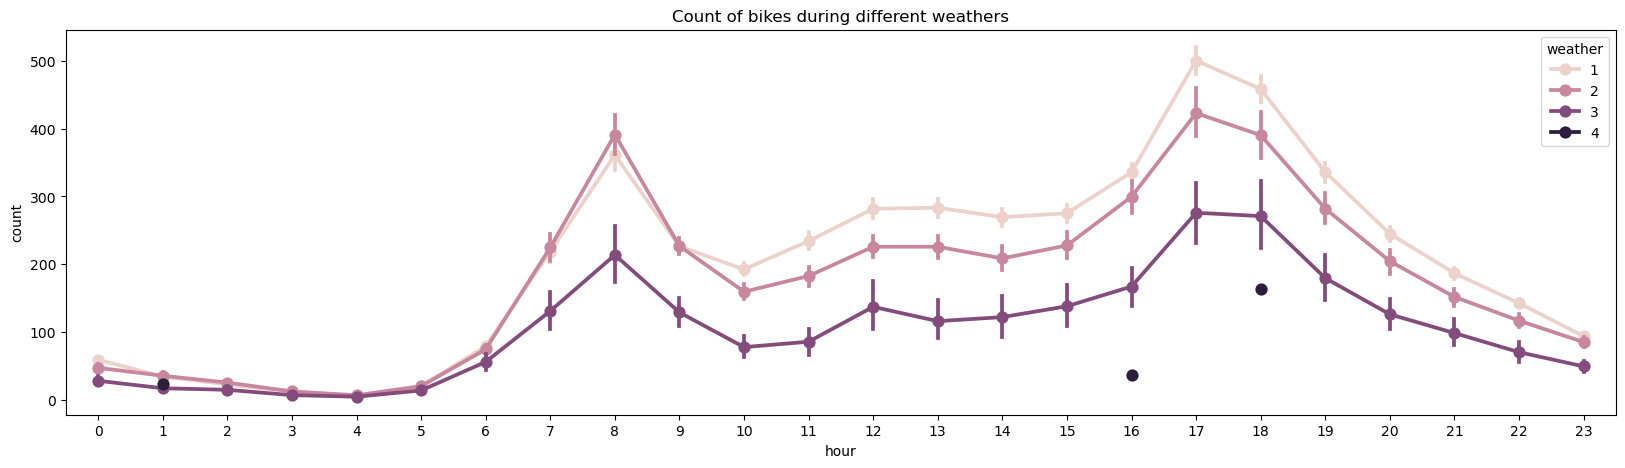

In [20]:
# Count of bikes during different weathers
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hour_data, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Count of bikes during different weathers')

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

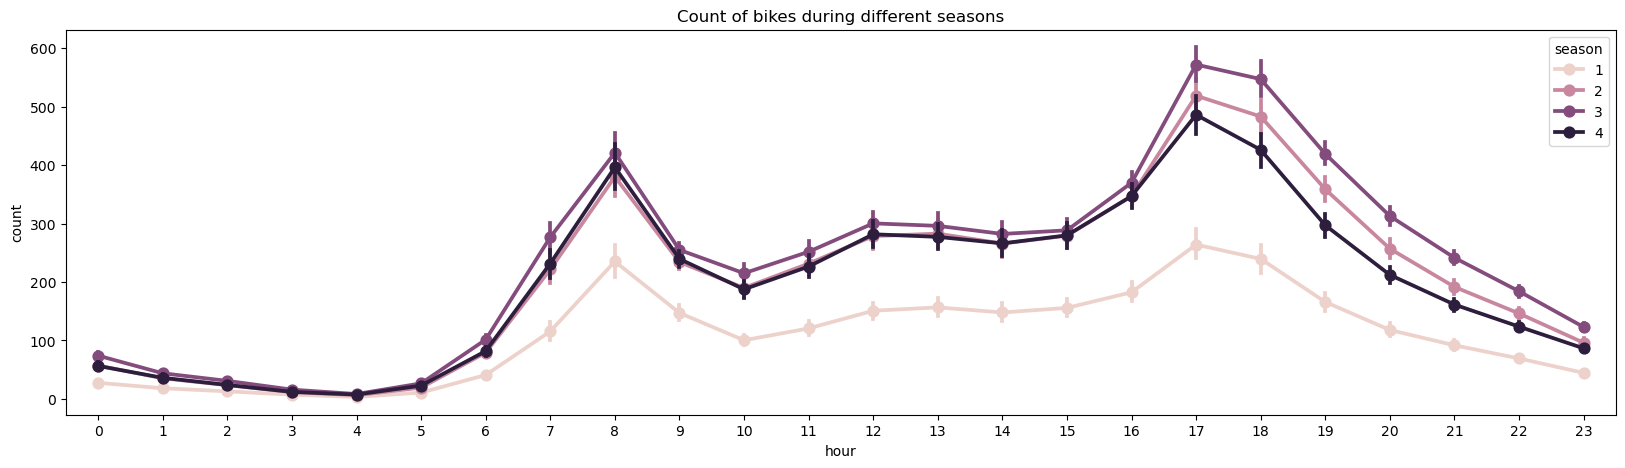

In [21]:
# Count of bikes during different seasons
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hour_data, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

[Text(0.5, 1.0, 'Count of bikes during different months')]

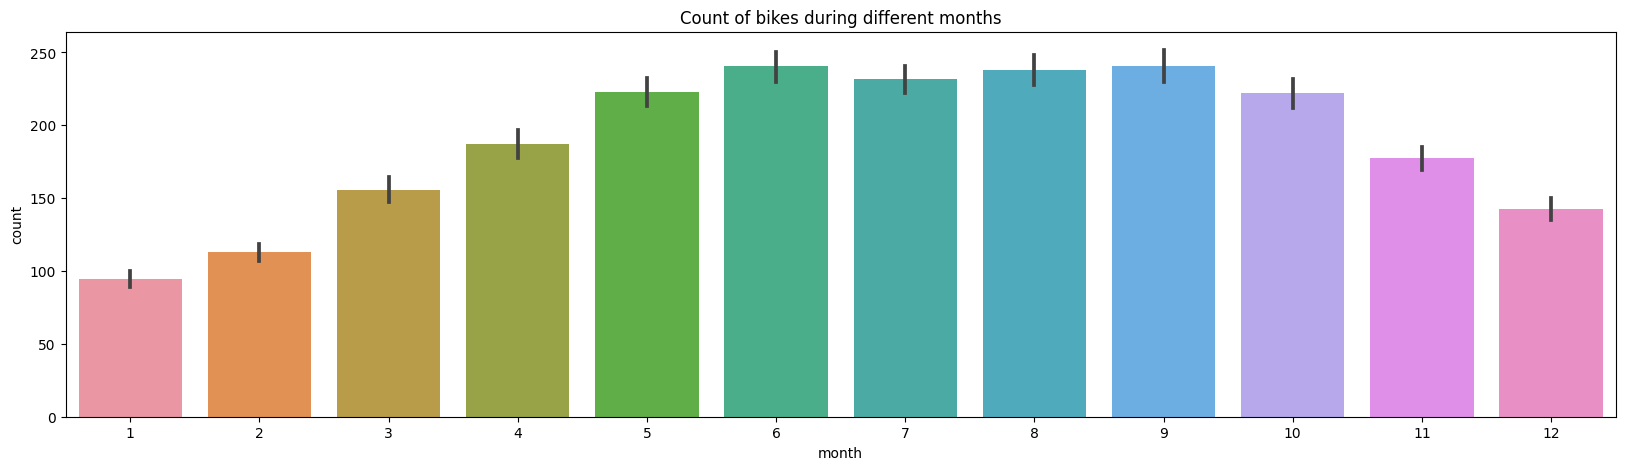

In [ ]:
# Count of bikes during different months
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=hour_data, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different days')]

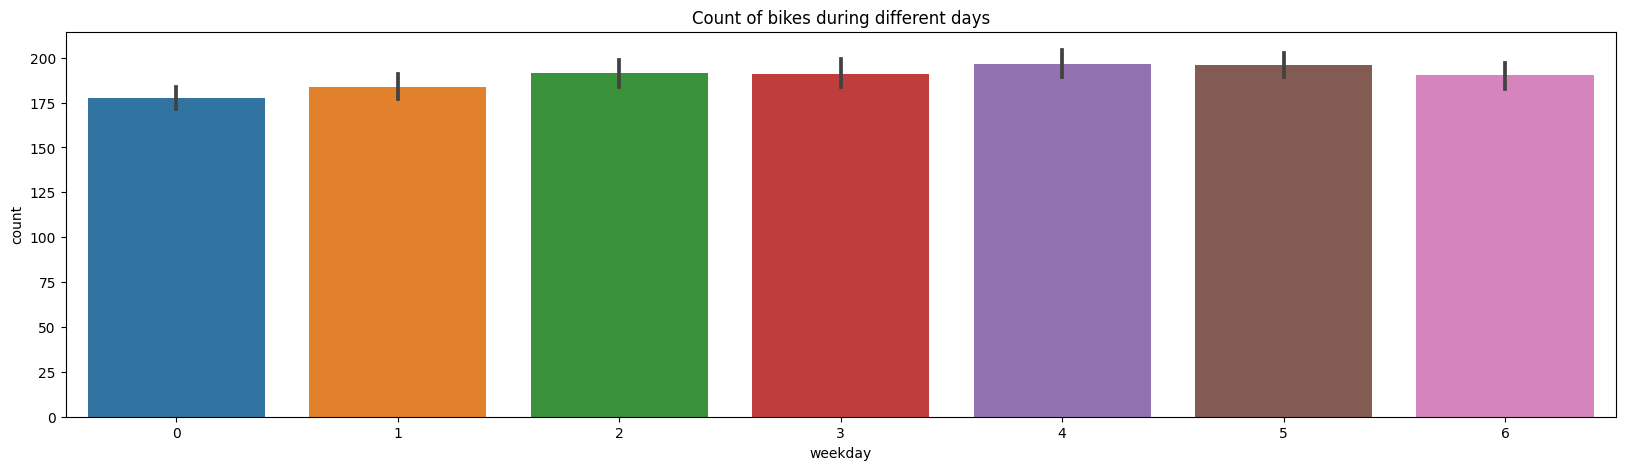

In [ ]:
# Count of bikes during different days
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=hour_data, x='weekday', y='count', ax=ax)
ax.set(title='Count of bikes during different days')

[Text(0.5, 1.0, 'Relation between humidity and users')]

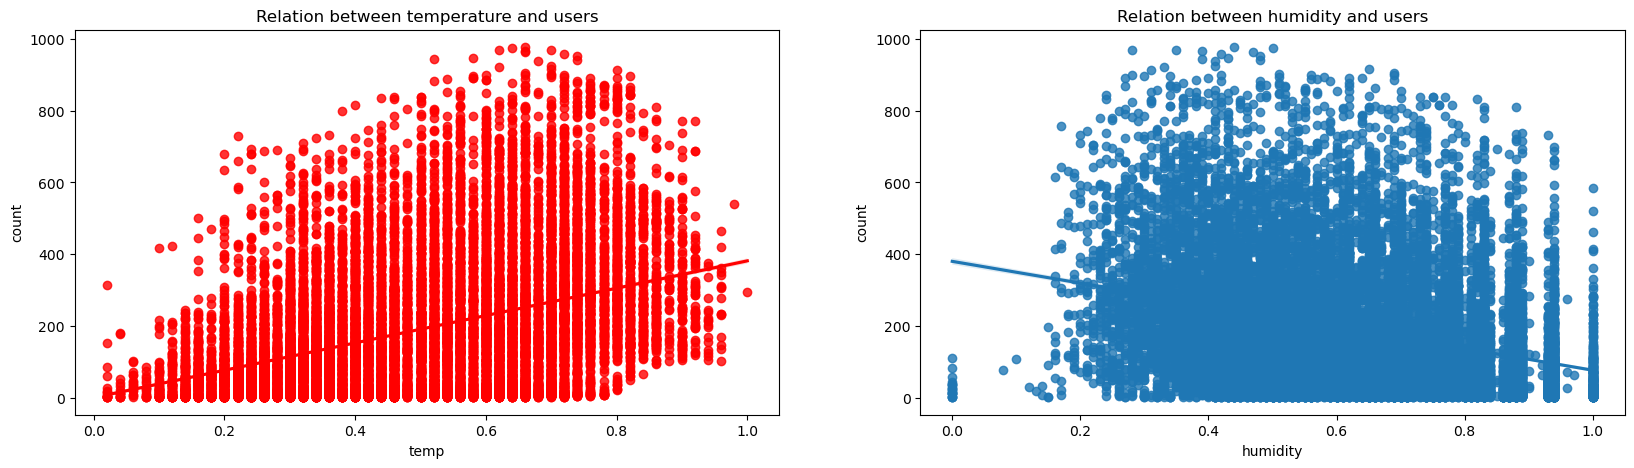

In [22]:
# relationship between temperature, humidity and users of the bikes
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.regplot(x=hour_data['temp'], y=hour_data['count'], ax=ax1 ,color='red')
ax1.set(title="Relation between temperature and users")
sns.regplot(x=hour_data['humidity'], y=hour_data['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

<ipython-input-19-1023973e99bc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hour_data['count'], ax=ax1 , color ='red')


[Text(0.5, 1.0, 'Theoritical quantiles')]

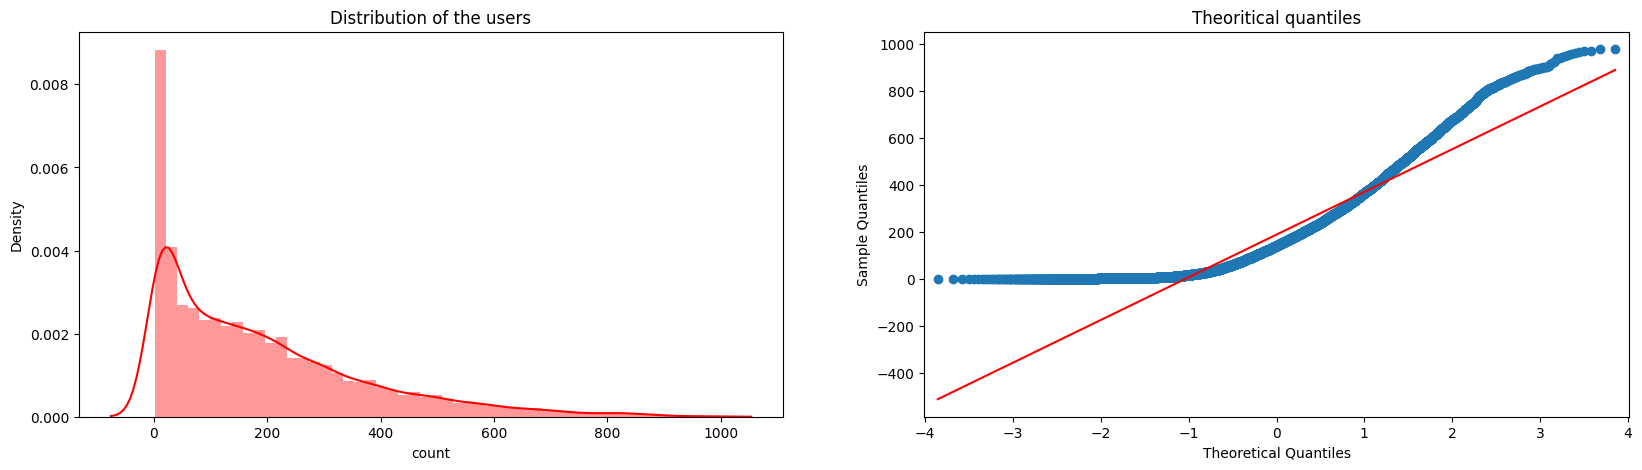

In [ ]:
# distribution of the users and the theoritical quantiles
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(hour_data['count'], ax=ax1 , color ='red')
ax1.set(title='Distribution of the users')
qqplot(hour_data['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

In [24]:
hour_data["dteday"]=pd.to_datetime(hour_data["dteday"])

<AxesSubplot: >

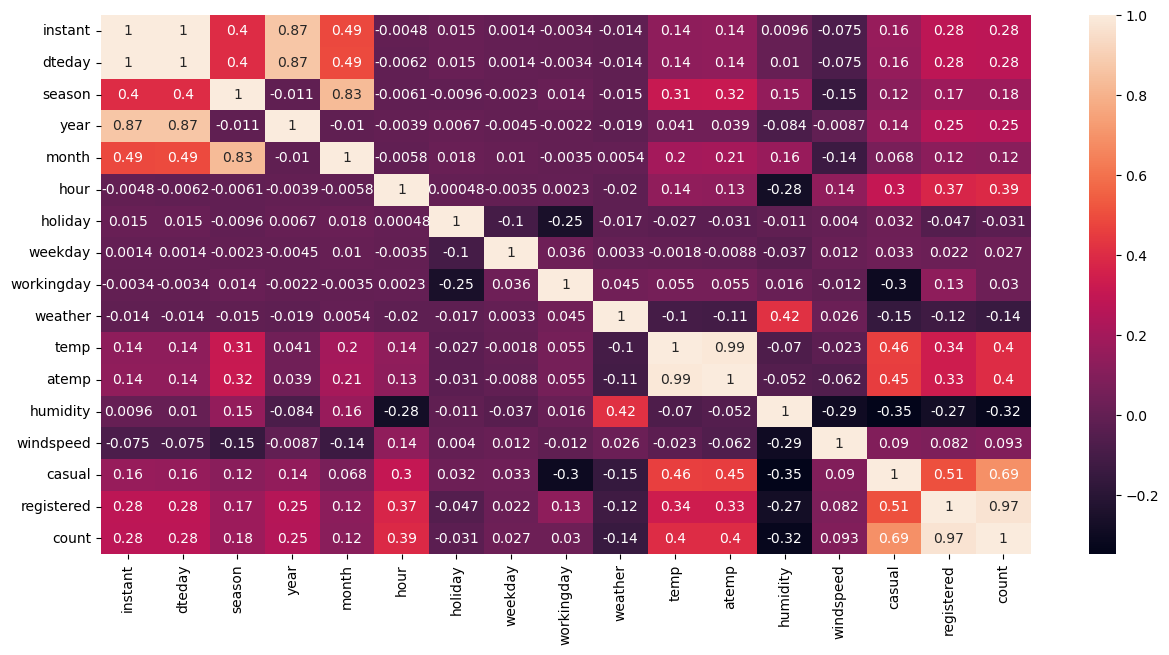

In [25]:
# checking for correlations in the data
corr = hour_data.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, annot_kws={'size':10})

## **Data Preprocessing**

In [26]:
pd.get_dummies(hour_data['season'], prefix='season', drop_first=True)

,season_2,season_3,season_4
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
17374,False,False,False
17375,False,False,False
17376,False,False,False
17377,False,False,False


In [28]:
hour_data_final = hour_data

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    hour_data_final = one_hot_encoding(hour_data_final, col)

In [29]:
hour_data_final = hour_data_final.drop(columns = ['instant' , 'dteday' , 'year'])

In [30]:
hour_data_final.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,16,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.22,0.2727,0.80,0.0,8,32,40,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0.22,0.2727,0.80,0.0,5,27,32,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0.24,0.2879,0.75,0.0,3,10,13,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0.24,0.2879,0.75,0.0,0,1,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False


## **Model Selection**

In [31]:
# getting the predictor variables
X = hour_data_final.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count'], axis=1)

# the target variable

y = hour_data_final['count']

In [32]:
models = [LinearRegression(),Ridge(),HuberRegressor(),ElasticNetCV(),DecisionTreeRegressor(),RandomForestRegressor()]

In [33]:
def train(model):
    kfold = model_selection.KFold(n_splits=5)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [34]:
for model in models:
    train(model)

Model: LinearRegression()
CV score: 18463.441562981905
Model: Ridge()
CV score: 18445.96661522119


/home/bravin/.local/lib/python3.11/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bravin/.local/lib/python3.11/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/bravin/.local/lib/python3.11/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

Model: HuberRegressor()
CV score: 17815.598047214695
Model: ElasticNetCV()
CV score: 19036.92794833495
Model: DecisionTreeRegressor()
CV score: 16865.109143659065
Model: RandomForestRegressor()
CV score: 12528.664360852219


## **Model Training** 

In [35]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [44]:
# initializing the linear regression model
lr = LinearRegression()

# fitting the model on training data
lr.fit(X_train, y_train)

# making predictions on test data
y_pred_lr = lr.predict(X_test)

# evaluating the model on # plot to show how the model was able to make predictions
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(y_test, y_pred_lr, alpha=0.5)
ax.set_xlabel('Actual Count')
ax.set_ylabel('Predicted Count')
ax.set_title('Linear Regression Model Prediction Results')
plt.show()root mean squared error
from sklearn.metrics import mean_squared_error

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Root Mean Squared Error: {rmse_lr:.3f}")

Root Mean Squared Error: 109.719


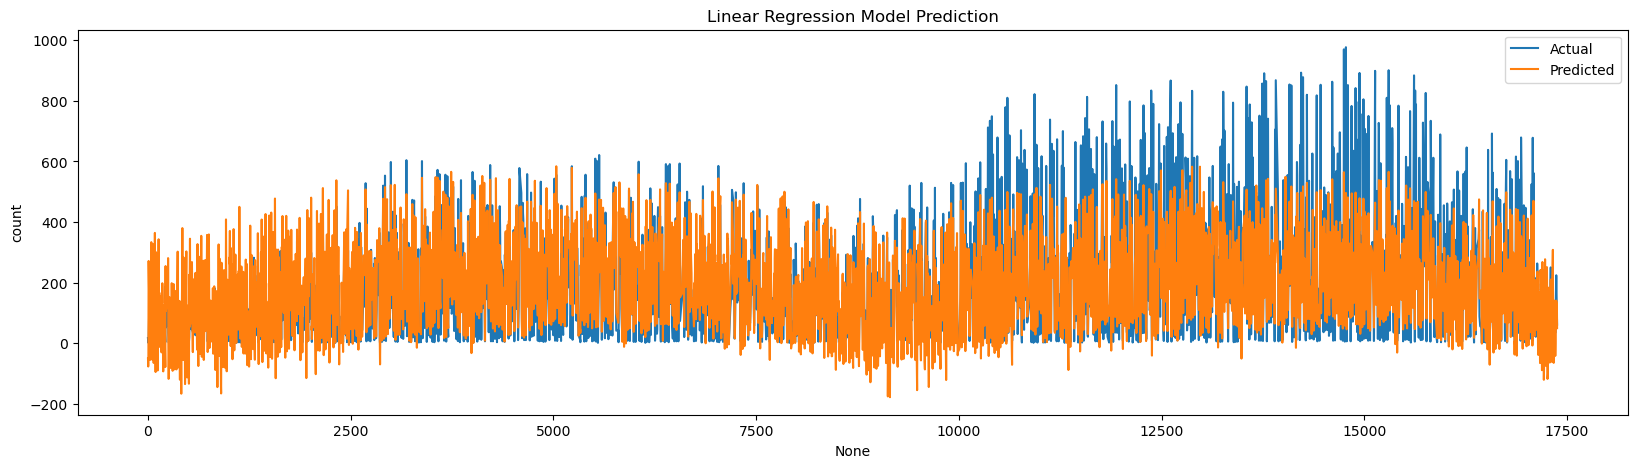

In [46]:
# plot the results
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(x=X_test.index, y=y_test, label='Actual', ax=ax)
sns.lineplot(x=X_test.index, y=y_pred_lr, label='Predicted', ax=ax)
ax.set(title='Linear Regression Model Prediction')
ax.legend()
plt.show()

In [57]:
rf = RandomForestRegressor(random_state=42)

rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [38]:
# making predictions on test data
y_pred_rf =rf.predict(X_test)

# evaluating the model on root mean squared error
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Root Mean Squared Error: {rmse_rf:.3f}")


Root Mean Squared Error: 75.364


In [40]:
# # initializing the random forest regression model
# rf = RandomForestRegressor(random_state=42)

# # hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_rf.fit(X_train, y_train) 


# # printing the best parameters
# print("Best parameters:", grid_rf.best_params_)

# # making predictions on test data
# y_pred_rf = grid_rf.predict(X_test)

# # evaluating the model on root mean squared error
# rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
# print(f"Root Mean Squared Error: {rmse_rf:.3f}")


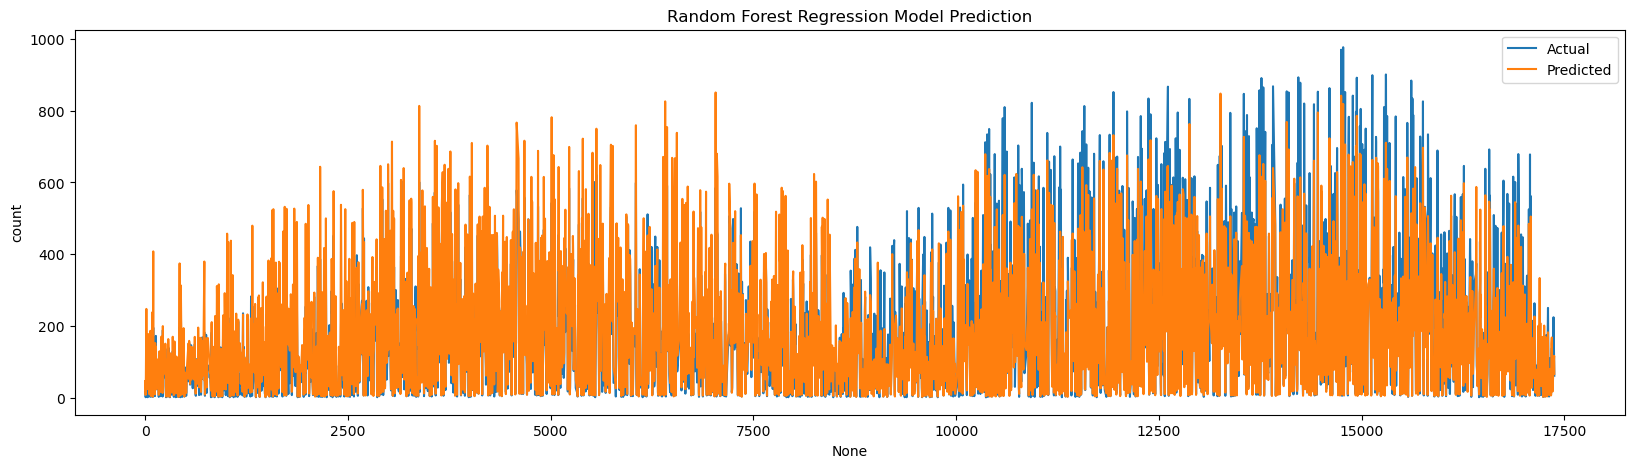

In [39]:
# plot the results
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(x=X_test.index, y=y_test, label='Actual', ax=ax)
sns.lineplot(x=X_test.index, y=y_pred_rf, label='Predicted', ax=ax)
ax.set(title='Random Forest Regression Model Prediction')
ax.legend()
plt.show()

In [41]:
mae = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 50.14


## **Decision Tree Regressor**

In [42]:
# # initialize decision tree regressor
# dt = DecisionTreeRegressor(random_state=42)

# # define hyperparameters for tuning
# param_grid = {'max_depth': [None, 2, 4, 6, 8, 10],
#               'min_samples_split': [2, 5, 10, 15, 20],
#               'min_samples_leaf': [1, 2, 5, 10, 15],
#               'max_features': ['auto', 'sqrt', 'log2']}

# # perform grid search with 5-fold cross-validation
# dt_grid = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')
# dt_grid.fit(X_train, y_train)

# # print best parameters and best score
# print(f"Best parameters: {dt_grid.best_params_}")
# print(f"Best score: {-dt_grid.best_score_:.3f}")

# # make predictions on test data using best model
# y_pred_dt = dt_grid.predict(X_test)

# # evaluate the model on root mean squared error
# rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
# print(f"Root Mean Squared Error: {rmse_dt:.3f}")


In [ ]:
# #  plot predicted vs actual counts
# fig, ax = plt.subplots(figsize=(10, 5))
# sns.lineplot(data=pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_dt}))
# ax.set(xlabel='Time', ylabel='Count', title='Predicted vs Actual Counts for Decision Tree Regression')

## **Linear Regression Model**

Root Mean Squared Error: 109.719


# **LightGBM Model**

In [ ]:
# create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# set hyperparameters for the model
params = {'objective': 'regression',
          'metric': 'rmse',
          'num_leaves': 50,
          'learning_rate': 0.05,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.8,
          'bagging_freq': 5,
          'min_child_samples': 20}

# train the model
lgb_model = lgb.train(params, train_data, num_boost_round=1000)

# make predictions on the test set
y_pred = lgb_model.predict(X_test)

# evaluate the model on root mean squared error
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse_lgbm:.2f}")

In [ ]:
# plot the predictions vs actual values
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(y_test, label='Actual')
ax.plot(y_pred, label='Predicted')
ax.set_xlabel('Index')
ax.set_ylabel('Count')
ax.set_title('LightGBM Regression: Actual vs Predicted')
ax.legend()
plt.show()

In [ ]:
# Root mean squared errors of each model
print(f"{'Model':<25}{'RMSE':<15}")
print("="*40)
print(f"{'Decision Tree Regressor':<25}{rmse_dt:<15.3f}")
print(f"{'Random Forest Regressor':<25}{rmse_rf:<15.3f}")
print(f"{'Linear Regression':<25}{rmse_lr:<15.3f}")
print(f"{'LightGBM':<25}{rmse_lgbm:<15.3f}")

In [50]:
# mean absolute errors
rf_mae = mean_absolute_error(y_test, y_pred_rf)
#dt_mae = mean_absolute_error(y_test, y_pred_dt)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
#lgb_mae = mean_absolute_error(y_test, y_pred)

In [52]:
# r2 score

rf_r2 = r2_score(y_test, y_pred_rf)
#dt_r2 = r2_score(y_test, y_pred_dt)
lr_r2 = r2_score(y_test, y_pred_lr)
#lgb_r2 = r2_score(y_test, y_pred)

In [53]:
# Grid for Mean Absolute Error (MAE)
print("MEAN ABSOLUTE ERROR")
mae_grid = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'Linear Regression' ],
    'MAE': [ rf_mae, lr_mae]
})
mae_grid = mae_grid.sort_values(by='MAE').reset_index(drop=True)
print(mae_grid)

print("----------------------------------------------------------------------")
print("----------------------------------------------------------------------")
print("R2 ERROR")
# Grid for R2 Score
r2_grid = pd.DataFrame({
    'Model': [ 'Random Forest Regressor', 'Linear Regression' ],
    'R2 Score': [ rf_r2, lr_r2 ]
})
r2_grid = r2_grid.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)
print(r2_grid)


MEAN ABSOLUTE ERROR
                     Model        MAE
0  Random Forest Regressor  50.143573
1        Linear Regression  79.020181
----------------------------------------------------------------------
----------------------------------------------------------------------
R2 ERROR
                     Model  R2 Score
0  Random Forest Regressor  0.823382
1        Linear Regression  0.625660


In [58]:
joblib.dump(rf, 'PredictionModel.pkl')

['PredictionModel.pkl']

In [59]:
loaded_model = joblib.load('PredictionModel.pkl')

In [60]:
preds=loaded_model.predict(X_test)

In [61]:
print(preds)

[377.97        89.2         12.86       ...  54.91        10.77
 143.18416667]


In [62]:
preds[:5]

array([377.97,  89.2 ,  12.86, 440.08,  47.73])